# Quantum query algorithms <a id="quantum-query-algorithms"></a>

## Table of Contents
- [Introduction](#Introduction)
- [Factoring and GCDs](#factoring-and-gcds)
- [Measuring computational cost](#measuring-computational-cost)
    - [Encodings and input length](#encodings-and-input-length)
    - [Elementary operations](#elementary-operations)
    - [Circuit size and depth](#circuit-size-and-depth)
    - [Cost as a function of input length](#cost-as-a-function-of-input-length)
    - [Classical computations on quantum computers](#classical-computations-on-quantum-computers)
- [Simulating Boolean circuits with quantum circuits](#simulating-boolean-circuits-with-quantum-circuits)
    - [Cleaning up the garbage](#cleaning-up-the-garbage)




## [Introduction](#Introduction)

Quantum algorithms offer provable advantages over classical algorithms in the query model of computation. But what about a standard model of computation, where problem inputs are given explicitly rather than in the form of an oracle or black box? This turns out to be a much more difficult question to answer, and to address it we must first establish a solid foundation upon which to base our investigation. This is the primary purpose of this lesson.

We'll begin by discussing computational cost, for both classical and quantum computations, and how it can be measured. This is a general notion that can be applied to a wide range of computational problems — but to keep things simple we'll mainly examine it through the lens of computational number theory, which addresses computational tasks that are likely to be familiar to most readers, including basic arithmetic, computing greatest common divisors, and integer factorization. While computational number theory is a narrow application domain, these problems serve well to illustrate the basic issues (and they also happen to be highly relevant to the lesson following this one).

Our focus will be on algorithms, as opposed to the ever-improving hardware on which they're run. Correspondingly, we'll be more concerned with how the cost of running an algorithm scales as the specific problem instances it is run on grow in size, rather than how many seconds, minutes, or hours some particular computation requires. We focus on this aspect of computational cost in recognition of the fact that algorithms have fundamental importance, and will naturally be deployed against larger and larger problem instances using faster and more reliable hardware as technology develops.

Finally, we'll turn to a critically important task, which is running classical computations on quantum computers. The reason this task is important is not because we hope to replace classical computers with quantum computers — which seems extremely unlikely to happen any time soon, if ever — but rather because it opens up many interesting possibilities for quantum algorithms. Specifically, classical computations running on quantum computers become available as subroutines, effectively leveraging decades of research and development on classical algorithms in pursuit of quantum computational advantages.

## [Factoring and GCDs](#factoring-and-gcds)


The classical computers that exist today are incredibly fast, and their speed seems to be ever increasing. For this reason, some might be inclined to believe that computers are so fast that no computational problem is beyond their reach.

This belief is false. Some computational problems are so inherently complex that, although there exist algorithms to solve them, no computer on the planet Earth today is fast enough to run these algorithms to completion on even moderately sized inputs within the lifetime of a human — or even within the lifetime of the Earth itself.

To explain further, let's introduce the *integer factorization* problem.

> **Integer factorization**  
> Input: an integer $N \geq 2$  
> Output: the prime factorization of $N$

By the *prime factorization* of $N$, we mean a list of the prime factors of $N$ and the powers to which they must be raised to obtain $N$ by multiplication. For example, the prime factors of 12 are 2 and 3, and to obtain 12 we must take the product of 2 to the power 2 and 3 to the power 1:

$$
12 = 2^2 \cdot 3
$$

Up to the ordering of the prime factors, there is only one prime factorization for each positive integer $N \geq 2$, which is a fact known as the *fundamental theorem of arithmetic*.

A few simple code demonstrations in Python will be helpful for further explaining integer factorization and other concepts that relate to this discussion. The following packages are needed for these demonstrations.



In [3]:
import math
from sympy.ntheory import factorint
import galois

The `factorint` function from the SymPy symbolic mathematics package for Python solves the integer factorization problem for whatever input $N$ we choose. For example, we can obtain the prime factorization for 12, which naturally agrees with the factorization above.

In [2]:
N = 12
display(factorint(N))

{2: 2, 3: 1}

Factoring small numbers like 12 is easy, but when the number N to be factored gets larger, the problem becomes more difficult. For example, running factorint on a significantly larger number causes a short but noticeable delay on a typical personal computer.

In [3]:
N = 3402823669209384634633740743176823109843098343
display(factorint(N))

{3: 2, 74519450661011221: 1, 5073729280707932631243580787: 1}

In [4]:
RSA1024 = 135066410865995223349603216278805969938881475605667027524485143851526510604859533833940287150571909441798207282164471551373680419703964191743046496589274256239341020864383202110372958725762358509643110564073501508187510676594629205563685529475213500852879416377328533906109750544334999811150056977236890927563
display(RSA1024)

135066410865995223349603216278805969938881475605667027524485143851526510604859533833940287150571909441798207282164471551373680419703964191743046496589274256239341020864383202110372958725762358509643110564073501508187510676594629205563685529475213500852879416377328533906109750544334999811150056977236890927563

For even larger values of N, things become impossibly difficult, at least as far as we know. For example, the RSA Factoring Challenge, which was run by RSA Laboratories from 1991 to 2007, offered a cash prize of $100,000 to factor the following number, which has 309 decimal digits (or 1024 bits when written in binary). The prize for this number was never collected and its prime factors remain unknown.

We need not bother running factorint on RSA1024, it wouldn't finish within our lifetimes.

The fastest known algorithm for factoring large integers is known as the number field sieve. As an example of this algorithm's use, the RSA challenge number RSA250, which has 250 decimal digits (or 829 bits when written in binary), was factored using the number field sieve in 2020. The computation required thousands of CPU core-years, distributed across tens of thousands of machines around the world.

In [5]:
RSA250 = 2140324650240744961264423072839333563008614715144755017797754920881418023447140136643345519095804679610992851872470914587687396261921557363047454770520805119056493106687691590019759405693457452230589325976697471681738069364894699871578494975937497937

p = 64135289477071580278790190170577389084825014742943447208116859632024532344630238623598752668347708737661925585694639798853367
q = 33372027594978156556226010605355114227940760344767554666784520987023841729210037080257448673296881877565718986258036932062711

display(RSA250 == p * q)

True

The security of the RSA public-key cryptosystem is based on the computational difficulty of integer factoring; an efficient algorithm for integer factoring would break it.

Next let's consider a related but very different problem, which is computing the greatest common divisor (or GCD) of two integers.

> Greatest common divisor (GCD)
> Input: nonnegative integers $N$ and $M$, at least one which is positive
> Ouput: the greatest common divisor of $N$ and $M$

The greatest common divisor of 2 numbers is the largest integer that evely divides both of them

This problem is easy to solve with a computer, it has roughlt the same computational cost as multipleuing the 2 input numbers together. The `gcd` funtion from the python `math` module computes the greatest common divisor of numbers that are considerable larger than RSA1024 in the blink of an eye. In fact RSA1024 is the GCD of the 2 numbers in the next example

In [ ]:
N = 4636759690183918349682239573236686632636353319755818421393667064929987310592347460711767784882455889983961546491666129915628431549982893638464243493812487979530329460863532041588297885958272943021122033997933550246447236884738870576045537199814804920281890355275625050796526864093092006894744790739778376848205654332434378295899591539239698896074
M = 5056714874804877864225164843977749374751021379176083540426461360945653967249306494545888621353613218518084414930846655066495767441010526886803458300440345782982127522212209489410315422285463057656809702949608368597012967321172325810519806487247195259818074918082416290513738155834341957254558278151385588990304622183174568167973121179585331770773

display(math.gcd(N, M))

This is possible because we have very efficient algorithms for computing GCDs, the most well-known of which is Euclid's algorithm, discovered over 2,000 years ago.

Could there be a fast algorithm for integer factorization that we just haven't discovered yet, allowing large numbers like RSA1024 to be factored in the blink of an eye? The answer is yes. Although we might expect that an efficient algorithm for factoring as simple and elegant as Euclid's algorithm for computing GCDs would have been discovered by now, there is nothing that rules out the existence of a very fast classical algorithm for integer factoring, beyond the fact that we've failed to find one thus far. One could be discovered tomorrow — but don't hold your breath. Generations of mathematicians and computer scientists have searched, and factoring numbers like RSA1024 remains beyond our reach.

## [Measuring computational cost](#measuring-computational-cost)

Next we'll discuss a mathematical framework through which computational cost can be measured, narrowly focused on the needs of this course. The analysis of algorithms and computational complexity are entire subjects onto themselves, and have much more to say about these notions.

As a starting point, consider the following figure from the previous lesson, which represents a very high level abstraction of a computation.



The computation itself could be modeled or described in a variety of ways, such as by a computer program written in Python, a Turing machine, a Boolean circuit, or a quantum circuit. Our focus will be on circuits (both Boolean and quantum).

#### Encodings and input length

Let's begin with the input and output of a computational problem, which we'll assume are binary strings. Different symbols could be used, but we'll keep things simple for the purposes of this discussion by restricting our attention to binary string inputs and outputs. Through binary strings, we can encode a variety of interesting objects that the problems we're interested in solving might concern, such as numbers, vectors, matrices, and graphs, as well as lists of these and other objects.

For example, to encode nonnegative integers, we can use binary notation. The following table lists the binary encoding of the first nine nonnegative integers, along with the length (meaning the total number of bits) of each encoding.

| **Number** | **Binary encoding** | **Length** |
|------------|---------------------|------------|
| 0          | 0                   | 1          |
| 1          | 1                   | 1          |
| 2          | 10                  | 2          |
| 3          | 11                  | 2          |
| 4          | 100                 | 3          |
| 5          | 101                 | 3          |
| 6          | 110                 | 3          |
| 7          | 111                 | 3          |
| 8          | 1000                | 4          |

We can easily extend this encoding to handle both positive and negative integers by appending a *sign bit* to the representations if we choose. Sometimes it's also convenient to allow binary representations of nonnegative integers to have leading zeros, which don't change the value being encoded but can allow representations to fill up a string or word of a fixed size.

Using binary notation to represent nonnegative integers is both common and efficient, but if we wanted to we could choose a different way to represent nonnegative integers using binary strings, such as the ones suggested in the following table. The specifics of these alternatives are not important to this discussion — the point is only to clarify that we do have choices for the encodings we use. (In this table, the symbol $ε$ represents the *empty string*, which has no symbols in it and length equal to zero. Naturally, to avoid an obvious source of confusion, we use a special symbol such as $ε$ to represent the empty string rather than literally writing nothing.)

| **Number** | **Unary encoding** | **Lexicographic encoding** |
|------------|--------------------|-----------------------------|
| 0          | $ε$                | $ε$                         |
| 1          | 0                  | 0                           |
| 2          | 00                 | 1                           |
| 3          | 000                | 00                          |
| 4          | 0000               | 01                          |
| 5          | 00000              | 10                          |
| 6          | 000000             | 11                          |
| 7          | 0000000            | 000                         |
| 8          | 00000000           | 001                         |

Other types of inputs, such as vectors and matrices, or more complicated objects like descriptions of molecules, can also be encoded as binary strings. Just like we have for nonnegative integers, a variety of different encoding schemes can be selected or invented. For whatever scheme we come up with to encode inputs to a given problem, we interpret the length of an input string as representing the size of the problem instance being solved.

For example, the number of bits required to express a nonnegative integer $N$ in binary notation, which is sometimes denoted $\lg(N)$, is given by the following formula.

$$
\lg(N) =
\begin{cases}
1 & \text{if } N = 0 \\
1 + \lfloor \log_2(N) \rfloor & \text{if } N \ge 1
\end{cases}
$$

Assuming that we use binary notation to encode the input to the integer factoring problem, the *input length* for the number $N$ is therefore $\lg(N)$. Note, in particular, that the length (or size) of the input $N$ is not $N$ itself; when $N$ is large we don’t need nearly this many bits to express $N$ in binary notation.

From a strictly formal viewpoint, whenever we consider a computational problem or task, it should be understood that a specific scheme has been selected for encoding whatever objects are given as input or produced as output. This allows computations that solve interesting problems to be viewed abstractly as transformations from binary string inputs to binary string outputs — and the details of how objects are encoded as binary strings must necessarily be important to these computations at some level.

Usually, though, we don’t worry all that much about these details when we’re analyzing computational cost, so that we can avoid getting into details of secondary importance. The basic reasoning is that we expect the computational cost of converting back and forth between “reasonable” encoding schemes to be insignificant compared with the cost of solving the actual problem. In those situations in which this is not the case, the details can (and should) be clarified.

For example, a very simple computation converts between the binary representation of a nonnegative integer and its lexicographic encoding (which we have not explained in detail, but it can be inferred from the table). For this reason, the computational cost of integer factoring wouldn’t differ significantly if we decided to switch from using one of these encodings to the other for the input $N$. On the other hand, encoding nonnegative integers in unary notation incurs an exponential blow-up in the total number of symbols required, and we would not consider it to be a “reasonable” encoding scheme for this reason.



### [Elementary operations](#elementary-operations)  

Now let’s consider the computation itself, which is represented by the blue rectangle in the figure above. The way that we’ll measure computational cost is to count the number of *elementary operations* that each computation requires. Intuitively speaking, an elementary operation is one involving a small, fixed number of bits or qubits that can be performed quickly and easily — such as computing the AND of two bits. In contrast, running the `factorint` function is not reasonably viewed as being an elementary operation.

Formally speaking, there are different choices for what constitutes an elementary operation depending on the computational model being used. Our focus will be on circuit models, and specifically quantum and Boolean circuits.

#### Universal gate sets

For circuit-based models of computation, it is typical that each *gate* is viewed as an elementary operation. This leads to the question of precisely which gates we permit in our circuits. Focusing for the moment on quantum circuits, we’ve seen several gates thus far in this series, including $X$, $Y$, $Z$, $H$, $S$, and $T$ gates, *swap* gates, controlled versions of gates (including *controlled-NOT*, *Toffoli*, and *Fredkin* gates), as well as gates that represent standard basis measurements. In the context of the CHSH game we also saw a few additional *rotation* gates.

We also discussed *query gates* in the context of the query model, and we also saw that any unitary operation $U$, acting on any number of qubits, can be viewed as being a gate if we so choose — but we’ll disregard both of these options for the sake of this discussion. We won’t be working in the query model (although the implementation of query gates using elementary operations is discussed later in the lesson), and viewing arbitrary unitary gates, potentially acting on millions of qubits, as being elementary operations does not lead to meaningful or realistic notions of computational cost.

Sticking with quantum gates that operate on small numbers of qubits, one approach to deciding which ones are to be considered elementary is to tease out a precise criterion — but this is not the standard approach or the one we’ll take. Rather, we simply make a choice. Here’s one standard choice, which we shall adopt as the *default gate set* for quantum circuits:

– Single-qubit unitary gates from this list: $X$, $Y$, $Z$, $H$, $S$, $T$, and $T^\dagger$  
– Controlled-NOT gates  
– Single-qubit standard basis measurements

A common alternative is to view Toffoli, Hadamard, and $S$ gates as being elementary, in addition to standard basis measurements. Sometimes all single-qubit gates are viewed as being elementary, though this does lead to an unrealistically powerful model when the accuracy with which gates are performed is not properly taken into account.

The unitary gates in our default collection form what’s called a *universal gate set*. This means that we can approximate any unitary operation, on any number of qubits, and to any degree of accuracy we wish, with circuits composed of these gates alone.  
To be clear, the definition of universality places no requirements on the cost of such approximations, meaning the number of gates from our set that we need. Indeed, a fairly simple argument based on the mathematical notion of *measure* reveals that most unitary operations must have extremely high cost. Proving the universality of quantum gate sets is not a simple matter and won’t be covered in this course.

For Boolean circuits, we’ll take AND, OR, NOT, and FANOUT gates to be the ones representing elementary operations. We don’t actually need both AND gates and OR gates — we can use *De Morgan’s laws* to convert from either one to the other by placing NOT gates on all three input/output wires — but nevertheless it is both typical and convenient to allow both AND and OR gates. AND, OR, NOT, and FANOUT gates form a universal set for deterministic computations, meaning that any function from any fixed number of input bits to any fixed number of output bits can be implemented with these gates.

---

## The principle of deferred measurement

Standard basis measurement gates can appear in quantum circuits, but sometimes it’s convenient to delay them until the end. This allows us to view quantum computations as consisting of a unitary part (representing the computation itself), followed by a simple read-out phase where qubits are measured one by one. This always can be done, provided that we’re willing to add additional gates for each deferred measurement. In the following figure, the circuit on the right illustrates how we can transform a circuit with early measurements.



Specifically, the classical bit in the circuit on the left is replaced by a qubit on the right (initialized to the $∣0⟩$ state), and the standard basis measurement is replaced by a controlled-NOT gate, followed by a standard basis measurement on the bottom qubit. The point is that the standard basis measurement in the right-hand circuit can be pushed all the way to the end of the circuit. If the classical bit in the circuit on the left is later used as a control bit, we can use the bottom qubit in the circuit on the right as a control instead, and the overall effect will be the same. (We are assuming that the classical bit in the circuit on the left doesn't get overwritten after the measurement takes place by another measurement — but if it did we could always just use a new classical bit rather than overwriting one that was used for a previous measurement.)

### [Circuit size and depth](#circuit-size-and-depth)  

Circuit size
The total number of gates in a circuit is referred to as that circuit's size. Thus, presuming that the gates in our circuits represent elementary operations, a circuit's size represents the number of elementary operations it requires — or, in other words, its computational cost. We write 
size $(C)$ to refer to the size of a given circuit $C$

For example, consider the following Boolean circuit for computing the XOR of two bits.



The size of this circuit is 7, because there are 7 gates in total. (Fanout operations are not always counted as being gates, but for the purposes of this lesson we will count FANOUT operations as being gates.)

---

#### Time, cost, and circuit depth

In the previous lesson we discussed the importance of time as a resource, or a limiting constraint, for computations. The examples above, such as the task of factoring RSA1024, reinforce this viewpoint. The factorint function doesn't fail to factor RSA1024 per se, it's just that we don't have enough time to let it finish.

The notion of computational cost, as the number of elementary operations required to perform a computation, is intended to be an abstract proxy for the time required to implement a computation. Each elementary operation requires a certain amount of time to perform, and the more of them a computation needs, the longer it's going to take, at least in general. In the interest of simplicity, we'll continue to make this association between computational cost and the time required to run algorithms.

But notice that the size of a circuit doesn't necessarily correspond directly to how long it takes to run. In our Boolean circuit for computing the XOR of two bits, for instance, the two FANOUT gates could be performed simultaneously, as could the two NOT gates, as well as the two AND gates. A different way to measure the efficiency of circuits, which takes this possibility of parallelization into account, is by their depth. This is the minimum number of layers of gates needed within the circuit, where the gates within in each layer operate on different wires. Equivalently, the depth of a circuit is the maximum number of gates encountered on any path from an input wire to an output wire. For the circuit above, for instance, the depth is 4.

Circuit depth is one way to formalize the running time of parallel computations. It's an advanced topic, and there exist very sophisticated circuit constructions known to minimize the depth required for certain computations. There are also some fascinating unanswered questions concerning circuit depth. (For example, much remains unknown about the circuit depth required to compute GCDs.) We won't have too much more to say about circuit depth in this series, aside from including a few interesting facts concerning circuit depth as we go along, but it should be clearly acknowledged that parallelization is a potential source of computational advantages.

---
#### Assigning costs to different gates

One final note concerning circuit size and computational cost is that it is possible to assign different costs to different gates, rather than viewing every gate as contributing equally to the total cost.

For example, as was already mentioned, FANOUT gates are often viewed as being free for Boolean circuits — which is to say that we could choose that FANOUT gates have zero cost. As another example, when we're working in the query model and we count the number of queries that a circuit makes to an input function (in the form of a black box), we're effectively assigning unit cost to query gates and zero cost to other gates, such as Hadamard gates. A final example is that we sometimes assign different costs to different gates depending on how difficult they are to implement, which could vary depending upon the hardware being considered.

While all of these options are sensible in different contexts, for this lesson we'll keep things simple and stick with circuit size as a representation of computational cost.

### [Cost as a function of input length](#cost-as-a-function-of-input-length)

We're primarily interested in how computational cost scales as inputs become larger and larger. This leads us to represent the costs of algorithms as functions of the input length.

## Families of circuits

Inputs to a given computational problem can vary in length, potentially becoming arbitrarily large. Every circuit, on the other hand, has a fixed number of gates and wires. For this reason, when we think about algorithms in terms of circuits, we generally need infinitely large *families* of circuits to represent algorithms. By a family of circuits, we mean a sequence of circuits that grow in size, allowing larger and larger inputs to be accommodated.

For example, imagine that we have a classical algorithm for integer factorization, such as the one used by `factorint`. Like all classical algorithms, it is possible to implement this algorithm using Boolean circuits — but to do it we'll need a separate circuit for each possible input length. If we looked at the resulting circuits for different input lengths, we would see that their sizes naturally grow as the input length grows — reflecting the fact that factoring 4-bit integers is much easier and requires far fewer elementary operations than factoring 1024-bit integers, for instance.

This leads us to represent the computational cost of an algorithm by a function $t$, defined so that $t(n)$ is the number of gates in the circuit that implements the algorithm for $n$ bit inputs. In more formal terms, an algorithm in the Boolean circuit model is described by a sequence of circuits $\{C_1, C_2, C_3, \dots\}$, where $C_n$ solves whatever problem we’re talking about for $n$-bit inputs (or, more generally, for inputs whose size is parameterized in some way by $n$), and the function $t$ representing the cost of this algorithm is defined as

$$
t(n) = \text{size}(C_n).
$$

For quantum circuits the situation is similar, where larger and larger circuits are needed to accommodate longer and longer input strings.

---

## Example: integer addition

To explain further, let's take a moment to consider the problem of integer addition, which is much simpler than integer factoring or even computing GCDs.

> **Integer addition**  
> Input: integers $N$ and $M$  
> Output: $N + M$

How might we design Boolean circuits for solving this problem?

To keep things simple, let’s restrict our attention to the case where $N$ and $M$ are both nonnegative integers represented by $n$-bit strings using binary notation. We’ll allow for any number of leading zeros in these encodings, so that

$$
0 \le N, M \le 2^n - 1.
$$

The output will be an $(n + 1)$-bit binary string representing the sum, which is the maximum number of bits we need to express the result.

We begin with an algorithm — the *standard algorithm* for addition of binary representations — which is the base 2 analogue to the way addition is taught in elementary/primary schools around the world. This algorithm can be implemented with Boolean circuits as follows.

Starting from the least significant bits, we can compute their XOR to determine the least significant bit for the sum. Then we compute the carry bit, which is the AND of the two least significant bits of $N$ and $M$. Sometimes these two operations together are known as a *half adder*.



Using the XOR circuit we've now seen a few times together with an AND gate and two FANOUT gates, we can build a half adder with 10 gates. If for some reason we changed our minds and decided to include XOR gates in our set of elementary operations, we would need 1 AND gate, 1 XOR gate, and 2 FANOUT gates to build a half adder.

Moving on to the more significant bits, we can use a similar procedure, but this time including the carry bit from each previous position into our calculation. By cascading 2 half adders and taking the OR of the carry bits they produce, we can create what's known as a full adder.



This requires 21 gates in total: 2 AND gates, 2 XOR gates (each requiring 7 gates to implement), one OR gate, and 4 FANOUT gates.

Finally, by cascading the full adders, we obtain a Boolean circuit for nonnegative integer addition. For example, the following circuit computes the sum of two 4-bit integers.



In general, this requires
$$
21(n - 1) + 10 = 21n - 11
$$

gates. Had we decided to include XOR gates in our set of elementary operations, we’d need $2n - 1$ AND gates, $2n - 1$ XOR gates, $n - 1$ OR gates, and $4n - 2$ FANOUT gates, for a total of $9n - 5$ gates. If in addition we decide not to count FANOUT gates, it’s $5n - 3$ gates.

---

## Asymptotic notation

On the one hand, it’s good to know precisely how many gates are needed to perform various computations, like in the example of integer addition above. These details are important for actually building the circuits.

On the other hand, if we perform analyses at this level of detail for all the computations we’re interested in, including ones for tasks that are much more complicated than addition, we’ll very quickly be buried in details. To keep things manageable, and to intentionally suppress details of secondary importance, we typically use *Big-O* notation when analyzing algorithms. Through this notation we can express the order at which functions grow.

Formally speaking, if we have two functions $g(n)$ and $h(n)$, we write that $g(n) = O(h(n))$ if there exists a positive real number $c > 0$ and a positive integer $n_0$ such that

$$
g(n) \le c \cdot h(n)
$$

for all $n \ge n_0$. Typically $h(n)$ is chosen to be as simple an expression as possible, so that the notation can be used to reveal the limiting behavior of a function in simple terms. For example, $17n^3 - 257n^2 + 65537 = O(n^3)$.

This notation can be extended to functions having multiple arguments in a fairly straightforward way. For instance, if we have two functions $g(n, m)$ and $h(n, m)$ defined on positive integers $n$ and $m$, we write that $g(n, m) = O(h(n, m))$ if there exists a positive real number $c > 0$ and a positive integer $k_0$ such that

$$
g(n, m) \le c \cdot h(n, m)
$$

whenever $n + m \ge k_0$.

Connecting this notation to the example of nonnegative integer addition, we conclude that there exists a family of Boolean circuits $\{C_1, C_2, \dots\}$, where $C_n$ adds two $n$-bit nonnegative integers together, such that $\text{size}(C_n) = O(n)$. This reveals the most essential feature of how the cost of addition scales with the input size: it scales *linearly*.

Notice also that it doesn’t depend on the specific detail of whether we consider XOR gates to have unit cost or cost 7. In general, using Big-O notation allows us to make statements about computational costs that aren’t sensitive to such low-level details.

---

## More examples

Here are a few more examples of problems from computational number theory, beginning with *multiplication*.

> **Integer multiplication**  
> Input: integers $N$ and $M$  
> Output: $NM$

Creating Boolean circuits for this problem is more difficult than creating circuits for addition — but by thinking about the standard multiplication algorithm, we can come up with circuits having size $O(n^2)$ for this problem (assuming $N$ and $M$ are both represented by $n$-bit binary representations). More generally, if $N$ has $n$ bits and $M$ has $m$ bits, there are Boolean circuits of size $O(nm)$ for multiplying $N$ and $M$.

There are, in fact, other ways to multiply that scale better. For instance, the Schönhage-Strassen multiplication algorithm can be used to create a Boolean circuit for multiplying two $n$-bit integers at cost $O(n \log(n) \log(\log(n)))$. The intricacy of this method causes a lot of overhead, however, making it only practical for numbers having tens of thousands of bits.

Another basic problem is *division*, which we interpret to mean computing both the quotient and remainder given an integer divisor and dividend.

> **Integer division**  
> Input: integers $N$ and $M \ne 0$  
> Output: integers $q$ and $r$ satisfying $0 \le r < |M|$ and $N = qM + r$

The cost of integer division is similar to multiplication: if $N$ has $n$ bits and $M$ has $m$ bits, there are Boolean circuits of size $O(nm)$ for solving this problem. And like multiplication, asymptotically superior methods are known.

We can now compare known algorithms for computing GCDs with those for addition and multiplication. Euclid’s algorithm for computing the GCD of an $n$-bit number $N$ and an $m$-bit number $M$ requires Boolean circuits of size $O(nm)$, similar to the standard algorithms for multiplication and division. Also similar to multiplication and division, there are asymptotically faster GCD algorithms — including ones requiring $O(n(\log(n))^2 \log(\log(n)))$ elementary operations to compute the GCD of two $n$-bit numbers.

A somewhat more expensive computation that arises in number theory is *modular exponentiation*.

> **Integer modular exponentiation**  
> Input: integers $N$, $K$, and $M$ with $K \ge 0$ and $M \ge 1$  
> Output: $N^K \pmod{M}$

By $N^K \pmod{M}$ we mean the remainder when $N^K$ is divided by $M$, meaning the unique integer $r$ satisfying $0 \le r < M$ and  
$N^K = qM + r$ for some integer $q$.

If $N$ has $n$ bits, $M$ has $m$ bits, and $K$ has $k$ bits, this problem can solved by Boolean circuits having size $O(km^2 + nm)$. This is not at all obvious. The solution is not to first compute $N^K$ and then take the remainder, which would necessitate using exponentially many bits just to store the number $N^K$. Rather, we can use the *power algorithm* (known alternatively as the *binary method* and *repeated squaring*), which makes use of the binary representation of $K$ to perform the entire computation modulo $M$. Assuming $N$, $M$, and $K$ are all $n$-bit numbers, we obtain an $O(n^3)$ algorithm — or a *cubic time* algorithm. And once again, there are known algorithms that are more complicated but asymptotically faster.

Python’s built-in `pow` function, which includes a modular exponentiation mode for fairly large input numbers, is a fast way to compute modular exponentiation, but it’s still classical.


In [1]:
K = 64135289477071580278790190170577389084825014742943447208116859632024532344630238623598752668347708737661925585694639798853367
N = 4636759690183918349682239573236686632636353319755818421393667064929987310592347460711767784882455889983961546491666129915628431549982893638464243493812487979530329460863532041588297885958272943021122033997933550246447236884738870576045537199814804920281890355275625050796526864093092006894744790739778376848205654332434378295899591539239698896074
M = 5056714874804877864225164843977749374751021379176083540426461360945653967249306494545888621353613218518084414930846655066495767441010526886803458300440345782982127522212209489410315422285463057656809702949608368597012967321172325810519806487247195259818074918082416290513738155834341957254558278151385588990304622183174568167973121179585331770773

display(pow(N, K**10 + 1, M**10 + 1))

5420808908959774060288987536719770456217318912094898225713892936909049029205875268391016773496273016272919329382669533127141405381618319955871147811133071683113976741106560564348611362839209748910974112799894385464900617664468329271717655067495341858822704829649579551724483155264208314048742469387847020407987537873027379036515942355206425576104942394452390040081069041858525217985044712018028991394635458870225358476099232040714610377672598679720015462702833934580459151626243131178465271884695260294198503010478207039551370657556801980546328939683389782893101937977023160027020824612118350981172299997784862364914426784395705304625946981620876565903630321426713564601636615003526450559450988257054265576673783996389684225946503950767764911765912500478971120407712043832726706539999202935732936820400534970855338294653369081634048804115320256182211145544094816107629124112742249226319353536843143250675559791743355892993051078488285292927178023438402583054839832109503781471596500072959107707020065

A different example, outside of the domain of computational number theory, arose in the previous lesson. For the post-processing step of Simon’s algorithm, we need to compute the null space modulo 2 of an $n \times m$ matrix of binary values (so here the input length is $nm$ bits in total). We can do this using Gaussian elimination with $O(nm \min\{n, m\})$ elementary operations, which is $O(n^3)$ elementary operations if $m = O(n)$. Even for a $1000 \times 1000$ binary matrix, which is a million bits of input, the computation time is on the order of seconds.


In [4]:
GF = galois.GF(2)

N, n = 1000, 1000

A = GF.Random((N, n))
B = A.null_space()
print(B)

[[0 0 0 1 1 1 0 0 1 1 1 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 1 1 1 1 1 1 0 1 0 0
  1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1
  0 0 0 1 1 0 1 0 1 0 1 1 1 1 0 0 0 1 1 0 0 0 1 0 1 1 1 1 0 0 0 0 0 1 1 0
  0 0 1 0 1 0 0 1 1 1 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1
  1 1 1 1 0 1 0 0 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 0 1 1
  0 0 1 1 1 0 0 0 0 1 0 1 0 0 1 1 1 0 0 0 1 0 0 1 0 1 1 1 0 1 0 1 0 1 0 1
  1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 1 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1
  1 0 0 1 1 1 0 0 0 0 0 1 0 1 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0 1 1 0 0 1 1 0
  0 1 1 1 1 0 1 0 0 1 1 0 0 1 1 1 1 1 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 1 1 1
  1 1 0 0 0 0 1 1 0 1 1 1 1 0 1 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 1 1 0 1 0 1
  1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 0
  1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 0 0 1 1 0 1 0 1 1 1 0 0 1 0
  0 1 0 1 0 1 1 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1
  1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 1 1 

## Cost of integer factorization

In contrast to the algorithms just discussed, known algorithms for integer factorization are much more expensive — as we might expect from the examples in the first section of the lesson.

One simple approach to factoring is *trial division*, where an algorithm searches through the list $2, \dots, \sqrt{N}$ to find a prime factor of an input number $N$. This requires $O(2^{n/2})$ iterations in the worst case when $N$ is an $n$-bit number. Each iteration requires a trial division, which means $O(n^2)$ elementary operations for each iteration (using a standard algorithm for integer division). We end up with circuits of size $O(n^2 2^{n/2})$, which is *exponential* in the input size $n$.

There are algorithms for integer factorization having better scaling. The number field sieve mentioned earlier, for instance, which is an algorithm that makes use of randomness, is generally believed (but not rigorously proven) to require

$$
2^{O(n^{1/3}(\log(n))^{2/3})}
$$

elementary operations to factor $n$-bit integers with high probability. While it is quite significant that $n$ is raised to the power $1/3$ in the exponent of this expression, the fact it appears in the exponent is still a problem that causes poor scaling — and explains in part why RSA1024 remains outside of its domain of applicability.

---

## Polynomial versus exponential cost

As we have seen, classical algorithms for integer addition, multiplication, division, and computing greatest common divisors allow us to solve these problems in the blink of an eye for inputs with thousands of bits. Addition has *linear* cost while the other three problems have *quadratic cost* (or *subquadratic* cost using asymptotically fast algorithms). Modular exponentiation is more expensive but can still be done pretty efficiently, with *cubic cost* (or sub-cubic cost using asymptotically fast algorithms).

These are all examples of algorithms having *polynomial* cost, meaning that they have cost $O(n^c)$ for some choice of a fixed constant $c > 0$. As a rough, first-order approximation, algorithms having polynomial cost are abstractly viewed as representing *efficient* algorithms. In contrast, known classical algorithms for integer factoring have *exponential* cost.

Sometimes the cost of the number field sieve is described as *sub-exponential* because $n$ is raised to the power $1/3$ in the exponent, but in complexity theory it is more typical to reserve this term for algorithms whose cost is

$$
O(2^{n^\varepsilon})
$$

for every $\varepsilon > 0$. The so-called *NP-complete* problems are a class of problems not known to (and widely conjectured not to) have polynomial-cost algorithms. A circuit-based formulation of the *exponential-time hypothesis* posits something even stronger, which is that no NP-complete problem can have a sub-exponential cost algorithm.

The association of polynomial-cost algorithms with efficient algorithms must be understood as being a loose abstraction. Of course, if an algorithm’s cost scales as $n^{10000}$ or $n^{1000000}$ for inputs of size $n$, then it’s a stretch to describe that algorithm as being efficient. However, even an algorithm having cost that scales as $n^{1.0000001}$ must be doing something clever to avoid having *exponential* cost, which is generally what we expect of algorithms based in some way on “brute force” or “exhaustive search.” Even the sophisticated refinements of the number field sieve, for instance, fail to avoid this exponential scaling in cost. Polynomial-cost algorithms, on the other hand, manage to take advantage of the problem structure in some way that avoids an exponential scaling.

In practice, the identification of a polynomial-cost algorithm for a problem is just a first step toward actual efficiency. Through algorithmic refinements, polynomial-cost algorithms with large exponents can sometimes be improved dramatically, lowering the cost to that of a “reasonable” polynomial — and making those problems easier when they’re known to be possible — so the presence of a polynomial model can indicate that a problem is not only solvable but also may permit more efficient algorithms.

As we consider advantages of quantum computing over classical computing, our eyes are generally turned first toward *exponential* advantages, or at least *super-polynomial* advantages — ideally finding polynomial-cost quantum algorithms for problems not known to have polynomial-cost classical algorithms. Theoretical advantages on this order have the greatest chances to lead to actual practical advantages — but identifying such advantages is an extremely difficult challenge. Only a few examples are currently known, but the search continues.

Polynomial (but not super-polynomial) advantages in computational cost of quantum over classical are also interesting and should not be dismissed — but given the current gap between quantum and classical computing technology, they do seem rather less compelling at the present time. One day, though, they could become significant. [Grover’s algorithm](https://en.wikipedia.org/wiki/Grover%27s_algorithm), for instance, which is covered in a later lesson, offers a *quadratic* advantage of quantum over classical for so-called *unstructured searching*, and has a potential for broad applications.

---

## A hidden cost of circuit computation

There is one final issue that’s worth mentioning, although we will not concern ourselves with it further in this course. There’s a “hidden” computational cost when we’re working with circuits, and it concerns the specifications of the circuits themselves. As inputs get longer and longer, larger and larger circuits are required — but we need to get our hands on the descriptions of these circuits somehow if we’re going to implement them.

For all of the examples we’ve discussed, or will discuss in subsequent lessons, there’s an underlying algorithm from which the circuits are derived. Usually the circuits in a family follow some basic pattern that’s easy to extrapolate to larger and larger inputs, such as cascading full adders to create Boolean circuits for addition or performing layers of Hadamard gates and other gates in some simple to describe pattern.

But what happens if there are prohibitive computational costs associated with the patterns in the circuits themselves? For instance, the description of each member $C_n$ in a circuit family could, in principle, be determined by some extremely difficult to compute function of $n$.

The answer is that this is indeed a problem — and so we must place additional restrictions on families of circuits beyond having polynomial cost in order for them to truly represent efficient algorithms. The property of *uniformity* for circuits does this by stipulating that, in various precise formulations, it must be computationally easy to obtain the description of each circuit in a family. All of the circuit families we’ll discuss do have this property — but this is nevertheless an important issue to be aware of in general when studying circuit models of computation from a formal viewpoint.


## [Classical computations on quantum computers](#classical-computations-on-quantum-computers)  

We’ll now turn our attention to implementing classical algorithms on quantum computers. We’ll see that any computation that can be performed with a classical Boolean circuit can also be performed by a quantum circuit with a similar asymptotic computational cost. Moreover, this can be done in a “clean” manner to be described shortly, which is an important requirement for using these computations as subroutines inside of larger quantum computations.

### [Simulating Boolean circuits with quantum circuits](#simulating-boolean-circuits-with-quantum-circuits)
Boolean circuits are composed of AND, OR, NOT, and FANOUT gates. To simulate Boolean circuit with quantum circuit, we'll begin by showing how each of these four gates can be simulated by quantum gates. Once that's done, converting a given Boolean circuit to a quantum circuit is a simple matter of simulating one gate at a time. We'll only need NOT gates, controlled-NOT gates, and Toffoli gates to do this, which are all deterministic operations in addition to being unitary.

#### Toffoli gates
Toffoli gates can alternatively be described as controlled-controlled-NOT gates, whose action on standard basis states is as shown in the following figure.



Bearing in mind that we're using Qiskit's ordering convention, where the qubits are ordered in increasing significance from top to bottom, the matrix representation of this gate is as follows.

$$
\begin{pmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\
\end{pmatrix}
$$

Another way to think about Toffoli gates is that they’re essentially query gates for the AND function, in the sense that they follow the pattern we saw in the previous lesson for unitary query gate implementations of arbitrary functions having binary string inputs and outputs.

Toffoli gates are not included in the default gate set discussed earlier in the lesson, but it is possible to construct a Toffoli gate from $H, T, T^\dagger$, and CNOT gates. Let’s verify this using Qiskit after doing a version check and taking care of a few imports.



In [5]:
from qiskit import __version__
print(__version__)

2.0.0


In [6]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Operator

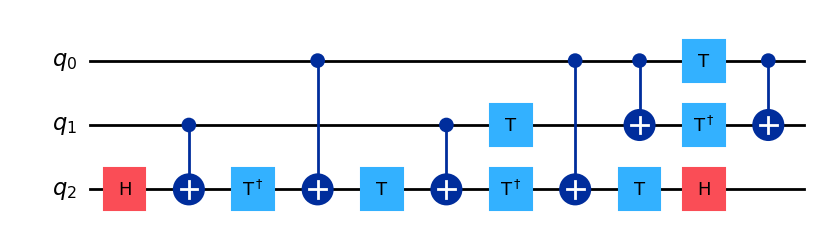

<IPython.core.display.Latex object>

In [7]:
Toffoli = QuantumCircuit(3)

Toffoli.h(2)
Toffoli.cx(1, 2)
Toffoli.tdg(2)
Toffoli.cx(0, 2)
Toffoli.t(2)
Toffoli.cx(1, 2)
Toffoli.tdg(2)
Toffoli.cx(0, 2)
Toffoli.t(1)
Toffoli.t(2)
Toffoli.cx(0, 1)
Toffoli.t(0)
Toffoli.tdg(1)
Toffoli.h(2)
Toffoli.cx(0, 1)

display(Toffoli.draw(output="mpl"))
display(Operator(Toffoli).draw("latex"))

#### Simulating Boolean gates with Toffoli, controlled-NOT, and NOT gates
A single Toffoli gate, used in conjunction with a few NOT gates, can implement an AND and OR gate, and FANOUT gates can easily be implemented using controlled-NOT gates, as the following diagrams suggest.



In all three cases, the qubits that the AND, OR, and FANOUT gates act upon come in from the left as inputs, and we also require one *workspace* qubit initialized to the zero state for each one. These workspace qubits appear inside of the boxes representing the gate implementations to suggest that they’re new, and therefore part of the cost of these implementations.

For the AND and OR gates we also have two qubits left over, in addition to the output qubit. For example, inside the box in the diagram representing the simulation of an AND gate, the top two qubits are left in the states $|a\rangle$ and $|b\rangle$. These qubits are illustrated as remaining inside of the boxes because they’re no longer needed and are not part of the output. They can be ignored for now, though we will turn our attention back to them shortly.

The remaining Boolean gate, the NOT gate, is included in our default set of quantum gates — so we don’t require a simulation for this one.

---

## Gate by gate simulation of Boolean circuits

Now suppose that we have an ordinary Boolean circuit named $C$, composed of AND, OR, NOT, and FANOUT gates, and having $n$ input bits and $m$ of output bits. Let $t = \text{size}(C)$ be the number of gates in $C$, and let’s give the name $f$ to the function that $C$ computes, which takes the form

$$
f : \Sigma^n \rightarrow \Sigma^m
$$

for $\Sigma = \{0,1\}$.

Now consider what happens when we go one at a time through the AND, OR, and FANOUT gates of $C$, replacing each one by the corresponding simulation described above, including the addition of the required workspace qubits. Let’s name the resulting circuit $\widetilde{R}$, and let’s order the qubits of $\widetilde{R}$ so that the $n$ input bits of $C$ correspond to the top $n$ qubits of $\widetilde{R}$ and the workspace qubits are on the bottom. As a result of performing these substitutions, we obtain a new circuit $\widetilde{R}$ that operates as this figure suggests:




Here, $k$ is the number of workspace qubits required, which is one for each AND, OR, and FANOUT gate of $C$, and $g$ is a function of the form

$$
g : \Sigma^n \rightarrow \Sigma^{n + k - m}
$$

that describes the states of the leftover qubits created by the gate simulations after $\widetilde{R}$ is run. In the figure, the qubits corresponding to the output $f(x)$ are on the top and the remaining, leftover qubits storing $g(x)$ are on the bottom. We can force this to happen if we wish by rearranging the qubits using SWAP gates, which can be implemented with three controlled-NOT gates like this:



As we'll see in the next section, it's not really essential to rearrange the output qubits like this, but it's easy enough to do it if we choose.

The function $g$ that describes the classical states of the leftover qubits is determined by the circuit 
$C$, but we actually don't need to worry all that much about it; we don't care specifically what state these qubits are in when the computation finishes. The letter 
$g$ comes after $f$ so it's a reasonable name for this function on that account, but there's a better reason to pick the name $g$ — it's short for garbage.

### [Cleaning up the garbage](#cleaning-up-the-garbage)

If our only interest is in evaluating the function $f$ computed by a given Boolean circuit $C$ with a quantum circuit, we don’t need to proceed any further than the gate-by-gate simulation just described. This means that, in addition to the output of the function, we’ll have a bunch of garbage left over.

However, this is not good enough if we want to perform classical computations as subroutines within larger quantum computations, because those garbage qubits will cause problems. The phenomenon of *interference* is critically important to quantum algorithms, and garbage qubits can ruin the interference patterns needed to make quantum algorithms work.

Fortunately, it’s not difficult to clean up the garbage, so to speak. The key is to use the fact that because $\widetilde{R}$ is a quantum circuit, we can run it in reverse, by simply replacing each gate with its inverse and applying them in the reverse order, thereby obtaining a quantum circuit for the operation $\widetilde{R}^\dagger$. Toffoli gates, CNOT gates, and NOT gates are actually their own inverses, so running $\widetilde{R}$ in reverse is really just a matter of applying the gates in the reverse order — but more generally any quantum circuit can be reversed as just described.

Specifically, what we can do is to add $m$ more qubits (recalling that the function $f$ has $m$ output bits), use CNOT gates to copy the output of $\widetilde{R}$ onto these qubits, and reverse $\widetilde{R}$ to clean up the garbage. The following figure illustrates the resulting circuit and describes its action on standard basis states.



If we put a box around the entire circuit and call it $Q$ it looks like this:



Given that $C$ has $t$ gates, the circuit $Q$ will have $O(t)$ gates.

If we disregard the $k$ additional workspace qubits, what we have is a circuit $Q$ that functions exactly like a query gate for the function $f$. If we simply want to compute the function $f$ on some string $x$, we can set $y = 0^m$ and the resulting value $f(x)$ will appear on the bottom $m$ qubits — or we can feed in a different state to the bottom $m$ qubits if we wish (perhaps to make use of a phase kickback, like in Deutsch's or the Deutsch–Jozsa algorithm). This means that for any query algorithm, if we have a Boolean circuit that computes the input function, we can replace each query gate with a circuit implementation of it as just described and the query algorithm will function correctly.

Note that the workspace qubits are needed to make this process work, but they are returned to their initial states once the combined circuit is executed. This allows these qubits to be used again as workspace qubits for other purposes. There are also known strategies to reduce the number of workspace qubits required (which come at a cost of making the circuits larger), but we won’t discuss those strategies here.

#### Implementing invertible functions

The construction just described allows us to simulate any Boolean circuit with a quantum circuit in a garbage-free manner. If $C$ is a Boolean circuit implementing a function $f : \Sigma^n \rightarrow \Sigma^m$, then we obtain a quantum circuit $Q$ that operates as follows on standard basis states.

$$
Q\left(|y\rangle|0^k\rangle|x\rangle\right) = |y \oplus f(x)\rangle|0^k\rangle|x\rangle
$$

The number $k$ indicates how many workspace qubits are required in total. This is enough for the purposes of this course, but it is possible to take this methodology one step further when the function $f$ itself is invertible.

To be precise, suppose that the function $f$ takes the form $f : \Sigma^n \rightarrow \Sigma^n$, and also suppose that there exists a function $f^{-1}$ such that $f^{-1}(f(x)) = x$ for every $x \in \Sigma^n$ (which is necessarily unique when it exists). This means that the operation that transforms $|x\rangle$ into $|f(x)\rangle$ for every $x \in \Sigma^n$ is unitary, so we might hope to build a quantum circuit that implements the unitary operation defined by

$$
U|x\rangle = |f(x)\rangle
$$

for every $x \in \Sigma^n$. To be clear, the fact that this is a unitary operation relies on $f$ being invertible — it’s not unitary when $f$ isn’t invertible. Disregarding the workspace qubits, $U$ is different from the operation that the circuit $Q$ implements because we’re not keeping a copy of the input around and XORing it to an arbitrary string, we’re *replacing* $x$ by $f(x)$.

The question is: when $f$ is invertible, can we do this?

The answer is yes, provided that we’re allowed to use workspace qubits and, in addition to having a Boolean circuit that computes $f$, we also have one that computes $f^{-1}$. (So, this isn’t a shortcut for computationally inverting functions when we don’t already know how to do that.) The following diagram illustrates how it can be done by composing two quantum circuits, $Q_f$ and $Q_{f^{-1}}$, which are obtained individually for the functions $f$ and $f^{-1}$ through the method described above, along with $n$ swap gates, taking $k$ to be the maximum of the numbers of workspace qubits required by $Q_f$ and $Q_{f^{-1}}$.

